<a href="https://colab.research.google.com/github/starkjones/Project-2-/blob/main/HousingAnalysisModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **US HOUSING ANALYSIS**

Jonathan Jones

22.05.05

In [124]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **BACK-UP DATASET**

In [172]:
data2 = '/content/drive/MyDrive/SI/Vienna Austria Airbnb.csv'
df2 = pd.read_csv(data2)

df2.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15883,b&b near Old Danube river,62142,Eva,NaN,Donaustadt,48.24262,16.42767,Hotel room,120,1,14,2021-10-07,0.17,3,364,3,NaN
1,38768,central cityapartement- wifi- nice neighbourhood,166283,Hannes,NaN,Leopoldstadt,48.21924,16.37831,Entire home/apt,66,3,336,2021-11-14,2.57,3,124,13,NaN
2,40625,"Near Palace Schönbrunn, Apt. 1",175131,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,156,1,162,2021-11-01,1.17,15,306,7,NaN
3,51287,little studio- next to citycenter- wifi- nice ...,166283,Hannes,NaN,Leopoldstadt,48.21778,16.37847,Entire home/apt,62,3,327,2021-11-22,2.47,3,136,18,NaN
4,70637,Flat in the Center with Terrace,358842,Elxe,NaN,Leopoldstadt,48.21760,16.38018,Private room,50,2,117,2021-06-25,0.90,3,333,1,NaN


In [173]:
df2.shape

(11429, 18)

1) Source of data:

http://insideairbnb.com/get-the-data/

2) Brief description of data
  Price per night and other pertinent facotrs for Vienna Austria 

3) What is the target?

  Price per night.

4) Is this a classification or regression problem?

  This is regression problem as the target value is not limited to a finite number of classes or values. 

5) How many features?

  18-1(target) columns = 17 features. 

6) How many rows of data.

  11429

7) What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

At a glance there are several columns that appear to be irrelevant to our target. I wonder if this dataset contains enough relevant features to make a meaningful prediction.

## **PRIMARY DATASET**

In [151]:
data = '/content/drive/MyDrive/SI/US Housing Machine Learning Data_Revised.xlsx'
df = pd.read_excel(data)
df.head(5)

,DATE,ASP_NHS,MSP_NHS,NOFHS,HOUST,UND_CONSTR,SNMH_(NSA),SNMH_(SI),SNMH_(AAR),SPCS_US_NHPI,...,COM_IND_LOANS,POPULATION,FED_FUND_RATE,UNEMPLOYMENT_RATE,GOODS_PRODUCING,LW_AUTO_SALES,CPI_AUC,CPI_AUC_FD,CPI_AUC-USE,WTI_COP
0,2022-03-01,523900,436700,407,1793,1622,11.3,115.552196,117,NaN,...,2520.2730,332782.634,0.18,3.6,20904,13.413,287.708,295.809,305.469,108.50
1,2022-02-01,508100,421600,392,1788,1585,9.3,96.735522,115,286.679,...,2480.6805,332717.925,0.08,3.8,20837,13.977,284.182,292.912,275.170,91.64
2,2022-01-01,499600,431100,393,1679,1556,9.1,96.210445,114,281.802,...,2477.4218,332650.428,0.08,4.0,20723,15.049,281.933,289.959,265.929,83.22
3,2021-12-01,491000,410000,387,1754,1526,8.0,87.893217,109,278.521,...,2478.0233,332629.610,0.08,3.9,20691,12.540,280.126,287.440,263.553,71.71
4,2021-11-01,498800,430300,389,1703,1490,9.1,99.081816,110,276.130,...,2438.6916,332566.553,0.08,4.2,20598,13.035,278.524,286.050,261.257,79.15


1) Source of data:

  https://fred.stlouisfed.org/

  https://www.bls.gov/

  https://www.hud.gov/


2) Brief description of data
  Home sales and home sale prices fof the united states

3) What is the target?

  Average home prices.

4) Is this a classification or regression problem?

  This is regression problem as the target value is not limited to a finite number of classes or values. 

5) How many features?

  22-2(target & SNMH (SI)) columns = 20 features. 

6) How many rows of data.

  399

7) What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

 A lot of the feautures appear to be highly correlated. My only concern would be the relatively limited number of columns. 

## **DATASET 2**

In [152]:
# # Unadulterated copy for Machine Learning:

df_ML = df.copy()

## **DATA DICTIONARY**:

**DATE:** Monthly date from January 1989 - March 2022 

**ASP NHS:** Average Sales Price for New Houses SOld in the UNited States (USD). Not Seasonally Adjusted

Federal Reserve Bank of St. Louis | Economic Research Division

**MSP NHS:** Median Sales Price for New Homes in the United States (USD). Not Seasonally Adjusted

Federal Reserve Bank of St. Louis | Economic Research Division

**NOFHS:** New One Family Homes for Sale in the United States (Thousands of Units). Seasonally Adjsuted. 

Federal Reserve Bank of St. Louis | Economic Research Division

**HOUST:** New privately-owned housing units started: Total Units (Thousands of Units). Seasonally Adjusted. U.S. Census Bureau, U.S. Department of Housing and Urban Development

**M1SL:** (Billions USD) "M1 is the money supply that is composed of currency, demand deposits, other liquid deposits—which includes savings deposits. M1 includes the most liquid portions of the money supply because it contains currency and assets that either are or can be quickly converted to cash" - Investopedia. 

Data from Board of Govenors of the Federal Reserve System (US)

**M2SL:** (Billions USD) "M2 is a calculation of the money supply that includes all elements of M1 as well as "near money." M1 includes cash and checking deposits, while near money refers to savings deposits, money market securities, and other time deposits (in amounts less than $100,000). These assets are less liquid than M1 and not as suitable as exchange mediums, but they can be quickly converted into cash or checking deposits." - Investopedia. 

Data from Board of Govenors of the Federal Reserve System (US)

**UND CONSTR:** New Privately-Owned Housing Units under construction: Total Units (Thousands of Units).Seasonally Adjusted. 
U.S. Census Bureau, U.S. Department of Housing and Urban Development

**UNEMPLOYMENT RATE:** Unemployment Rate (Percentage). Seasonally Adjusted.
U.S. Bureau of Labor Statistics

**POPULATION:** Total population: All Ages including Armed Forces Overseas (Thousands of Persons). 
U.S. Census Bureau

**GOODS PRODUCING:** All Employees, Goods-Producing (Thousands of Persons). Seasonally Adjusted. 
U.S. Bureau of Labor Statistics


**LW AUTO SALES:** Light Weiht Vehicle Sales by Month: Autos and Light Trucks (Millions of Units).
U.S. Bureau of Economic Analysis

**SPCS US NHPI:** S&P/ Case-Schiller US National Home Price Index by Month.

S&P Dow JOnes Indices LLC

**FED FUND RATE:** Federal Funds Effective Rate, by Month (Percentage). Not Seasonally Adjusted. 
Board of Governors of the Federal Reserve System (US)

**TOTAL CON CRED:** Total Consumer Credit Owned and Securitized by Month (Billions USD). Seasonally Adjsuted. 

Board of Governors of the Federal Reserve System (US)

**COM IND LOANS:** Commercial and Industrial Loans, All Commercial Banks (Billions USD), by Month. 
Board of Governors of the Federal Reserve System (US)

**SNMH (NSA):** Shipments of New Manufactured Homes by Month (Thousands of Units). Not Seasonally Adjusted.        

**SNMH (SI):** Shipments of New Manufactured Homes by Month (Thousands of Units). Seasonal Index.        

**SNMH (AAR):**   Shipments of New Manufactured Homes by Month (Thousands of Units). Seasonally Adjusted Annual Rate.  

**CPI AUC:** Consumer Price Index for All Urban Consumers: All Items in U.S. City Average.

U.S. Bureau of Labor Statistics

**CPI AUC FD:** Consumer Price Index for All Urban Consumers: Food in U.S. City Average

U.S. Bureau of Labor Statistics

**CPI AUC USE:** Consumer Price Index for All Urban Consumers: Energy in U.S. City Average

U.S. Bureau of Labor Statistics

**WTI COP:** Crude Oil Prices (USD per barrel: West Texas Intermediate (WTI) - Cushing, Oklahoma. Not Seasonally Adjusted. 

U.S. Energy Information Administration



In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               399 non-null    datetime64[ns]
 1   ASP_NHS            399 non-null    int64         
 2   MSP_NHS            399 non-null    int64         
 3   NOFHS              399 non-null    int64         
 4   HOUST              399 non-null    int64         
 5   UND_CONSTR         399 non-null    int64         
 6   SNMH_(NSA)         399 non-null    float64       
 7   SNMH_(SI)          399 non-null    float64       
 8   SNMH_(AAR)         399 non-null    int64         
 9   SPCS_US_NHPI       398 non-null    float64       
 10  M1SL               399 non-null    float64       
 11  M2SL               399 non-null    float64       
 12  TOTAL_CON_CREDIT   399 non-null    float64       
 13  COM_IND_LOANS      399 non-null    float64       
 14  POPULATION

In [154]:
df.columns = df.columns.str.lower()

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               399 non-null    datetime64[ns]
 1   asp_nhs            399 non-null    int64         
 2   msp_nhs            399 non-null    int64         
 3   nofhs              399 non-null    int64         
 4   houst              399 non-null    int64         
 5   und_constr         399 non-null    int64         
 6   snmh_(nsa)         399 non-null    float64       
 7   snmh_(si)          399 non-null    float64       
 8   snmh_(aar)         399 non-null    int64         
 9   spcs_us_nhpi       398 non-null    float64       
 10  m1sl               399 non-null    float64       
 11  m2sl               399 non-null    float64       
 12  total_con_credit   399 non-null    float64       
 13  com_ind_loans      399 non-null    float64       
 14  population

In [156]:
# Shape of data frame:

df.shape

# 399 rows 
# 16 columns

(399, 23)

##**DATA CLEANING & PREPARATION**

In [157]:
# Check for duplciated rows:

df.duplicated().sum()

0

In [158]:
# Check for missing values:

df.isna().sum()

date                 0
asp_nhs              0
msp_nhs              0
nofhs                0
houst                0
und_constr           0
snmh_(nsa)           0
snmh_(si)            0
snmh_(aar)           0
spcs_us_nhpi         1
m1sl                 0
m2sl                 0
total_con_credit     0
com_ind_loans        0
population           0
fed_fund_rate        0
unemployment_rate    0
goods_producing      0
lw_auto_sales        0
cpi_auc              0
cpi_auc_fd           0
cpi_auc-use          0
wti_cop              0
dtype: int64

In [161]:
# Imputation:

df['spcs_us_nhpi'].fillna(method = 'bfill', inplace = True)

In [ ]:
# Dropping ineffectional columns:

df.drop(columns = 'snmh_(si)', inplace =True )

In [162]:
# Final check for missing values:

df.isna().sum()

date                 0
asp_nhs              0
msp_nhs              0
nofhs                0
houst                0
und_constr           0
snmh_(nsa)           0
snmh_(si)            0
snmh_(aar)           0
spcs_us_nhpi         0
m1sl                 0
m2sl                 0
total_con_credit     0
com_ind_loans        0
population           0
fed_fund_rate        0
unemployment_rate    0
goods_producing      0
lw_auto_sales        0
cpi_auc              0
cpi_auc_fd           0
cpi_auc-use          0
wti_cop              0
dtype: int64

In [163]:
# Check for insconsistencies and odd numeric entries:

df.describe().round(1)

,asp_nhs,msp_nhs,nofhs,houst,und_constr,snmh_(nsa),snmh_(si),snmh_(aar),spcs_us_nhpi,m1sl,...,com_ind_loans,population,fed_fund_rate,unemployment_rate,goods_producing,lw_auto_sales,cpi_auc,cpi_auc_fd,cpi_auc-use,wti_cop
count,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,...,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0
mean,260657.9,216736.3,313.1,1318.9,920.7,13.6,100.0,162.9,139.1,2721.2,...,1276.8,294295.3,2.9,5.9,21571.3,15.3,196.4,196.7,166.9,47.6
std,89860.7,77495.1,92.5,391.1,262.5,8.8,11.2,103.6,51.4,4084.1,...,606.6,25953.8,2.6,1.7,2018.0,2.1,42.4,45.6,56.0,28.8
min,137700.0,113000.0,142.0,478.0,414.0,2.7,72.4,40.0,73.6,773.5,...,583.7,246224.0,0.0,3.5,17627.0,8.6,121.2,121.6,90.3,11.4
25%,172350.0,144950.0,269.0,1079.0,736.0,6.8,91.7,82.5,84.6,1102.1,...,806.6,272212.5,0.2,4.6,19844.5,14.1,159.9,156.6,107.3,21.1
50%,263200.0,217000.0,303.0,1331.0,941.0,10.3,101.1,127.0,142.0,1370.3,...,1078.0,296440.0,2.3,5.5,22036.0,15.7,196.1,191.1,176.4,40.8
75%,326400.0,269800.0,351.5,1583.0,1105.5,18.7,108.1,213.5,175.6,2649.4,...,1581.1,317247.7,5.2,6.7,23169.0,16.9,234.4,238.1,213.1,68.0
max,523900.0,436700.0,572.0,2273.0,1622.0,36.0,124.2,390.0,286.7,20710.1,...,3033.0,332782.6,9.8,14.7,24717.0,21.7,287.7,295.8,305.5,133.9


##**VISUAL ANALYSIS**

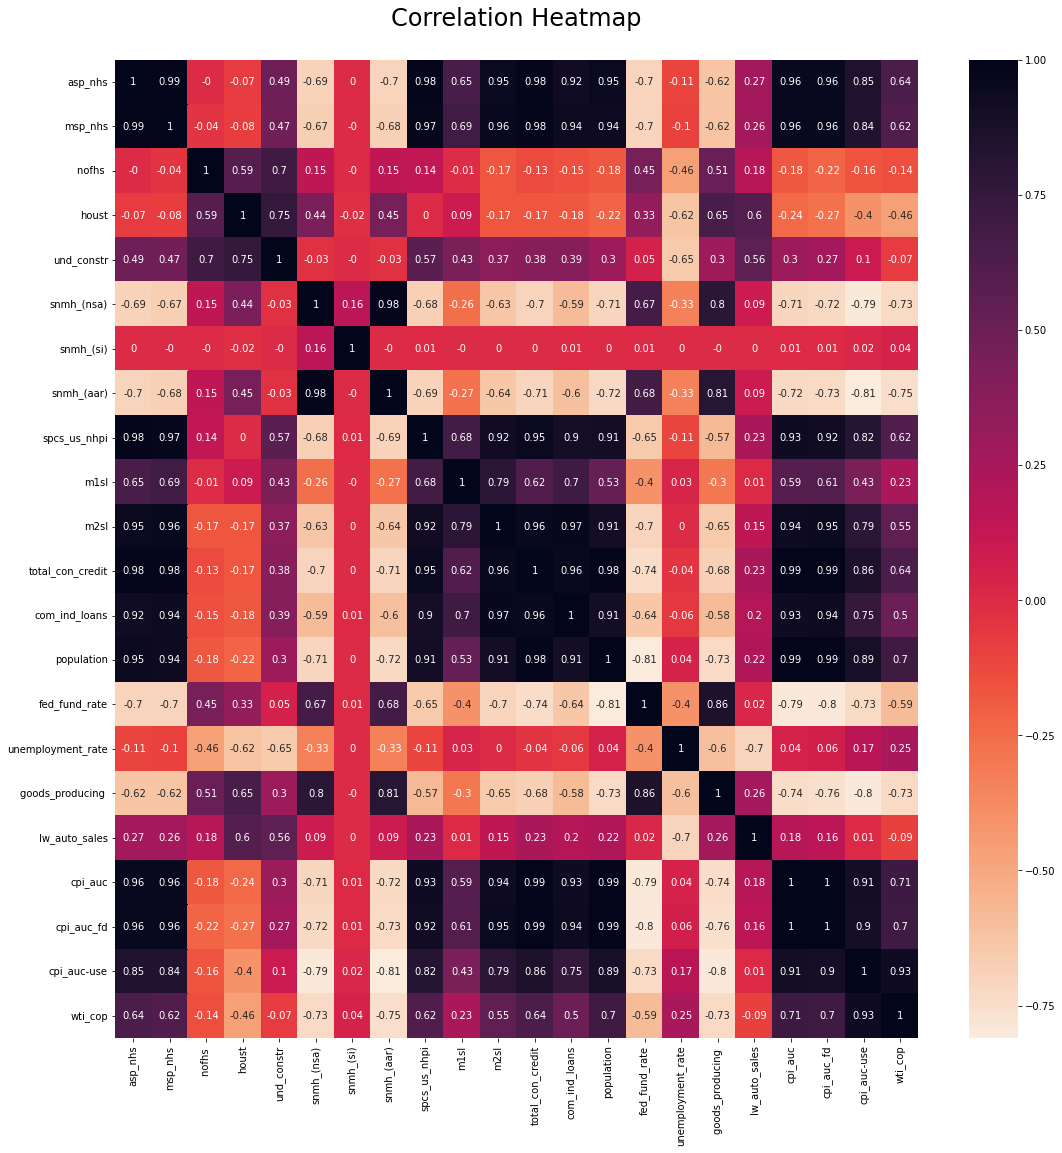

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation map to ascertain related features:

correlation = df.corr().round(2)

fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(18,18));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

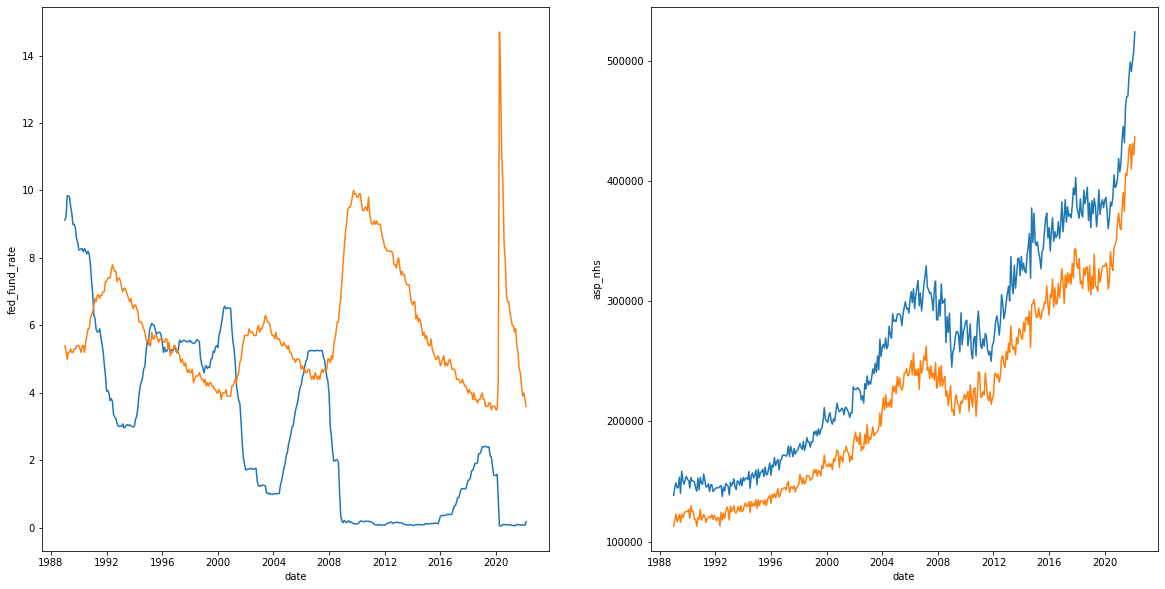

In [170]:
import matplotlib.patches as mpatches

fig, axes = plt.subplots(nrows=1, ncols =2, figsize=(20,10));

fed_fund = sns.lineplot(data =df, x= 'date', y = 'fed_fund_rate', ax = axes[0]);
uer = sns.lineplot(data =df, x= 'date', y = 'unemployment_rate', ax = axes[0]);
asp = sns.lineplot(data =df, x= 'date', y = 'asp_nhs', ax = axes[1]);
msp = sns.lineplot(data =df, x= 'date', y = 'msp_nhs', ax = axes[1]);